In [ ]:
import pandas as pd
import numpy as np
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [ ]:
dataFrame.info()

In [ ]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,1.141613,102.672734,1054.061525,3333.335724,424.041644,0.009134,0.235648,1.549989,0.090850,0.309790,0.019027,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,9.374137,365.368355,1057.620796,2298.396221,2021.142069,0.003906,2.215631,23.059178,1.035261,2.788495,0.331812,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,0.064715,0.144430,0.466579,0.999220,13.056960,0.003455,0.002917,0.000000,0.000000,0.010210,0.001159,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,0.074737,0.304533,1.108708,1927.132167,24.015480,0.006637,0.016901,0.019352,0.010198,0.019436,0.002907,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,0.079767,0.444688,1325.126000,2827.712667,34.255090,0.008242,0.026800,0.033860,0.014313,0.024275,0.004155,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,0.086013,0.764862,1814.114333,4181.336000,66.709667,0.010620,0.042212,0.055091,0.019213,0.030505,0.005840,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,101.036000,3721.492667,5046.618667,12703.334000,12737.012667,0.040324,34.974000,512.952000,15.544000,40.155333,7.772000,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [ ]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


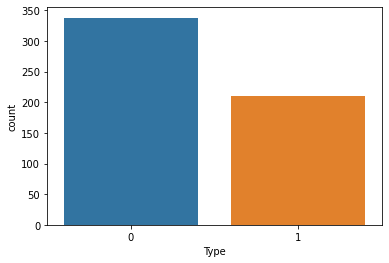

In [ ]:
sbn.countplot(x="Type",data=dataFrame)

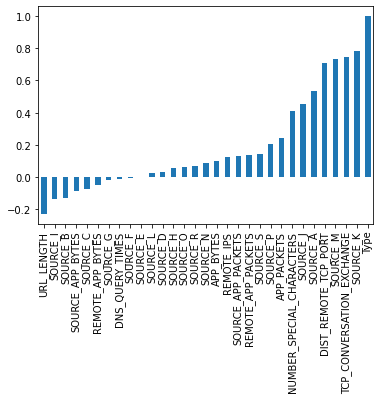

In [ ]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [ ]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [ ]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 0s 14ms/step - loss: 0.6810 - val_loss: 0.6833
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6575 - val_loss: 0.6725
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6303 - val_loss: 0.6552
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5983 - val_loss: 0.6347
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5594 - val_loss: 0.6084
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5140 - val_loss: 0.5680
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4660 - val_loss: 0.5317
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4132 - val_loss: 0.4852
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3589 - val_loss: 0.4396
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3138 - val_loss: 0.4103
Epoch 11

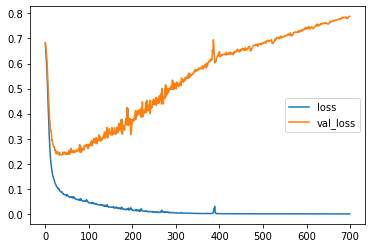

In [ ]:
lossData= pd.DataFrame(model.history.history)
lossData.plot()

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [ ]:
earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])


In [ ]:
lossData= pd.DataFrame(model.history.history)
lossData.plot()

In [ ]:
 model = Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])


Epoch 1/700
12/12 [==============================] - 0s 11ms/step - loss: 0.7273 - val_loss: 0.6861
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6922 - val_loss: 0.6840
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6980 - val_loss: 0.6826
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6815 - val_loss: 0.6811
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6834 - val_loss: 0.6792
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6619 - val_loss: 0.6772
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6528 - val_loss: 0.6748
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6605 - val_loss: 0.6708
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6588 - val_loss: 0.6679
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6549 - val_loss: 0.6642
Epoch 11

In [ ]:
lossData= pd.DataFrame(model.history.history)
lossData.plot()

In [ ]:
guesses = model.predict_classes(x_test)
guesses

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,guesses))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        91
           1       0.90      0.89      0.90        74

    accuracy                           0.91       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.91      0.91      0.91       165



In [ ]:
print(confusion_matrix(y_test,guesses))

[[84  7]
 [ 8 66]]
